In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold, learning_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

## Caricamento dataset

In [25]:
# Carica i dati di training e testing dai file CSV
df_train = pd.read_csv("Dataset/training_balanced.csv")
df_test = pd.read_csv("Dataset/testing.csv")

# Separazione delle feature e del target nei dati di training e testing
x_train = df_train.drop(['GradeClass', 'StudentID', 'GPA'], axis=1)
y_train = df_train['GradeClass']
x_test = df_test.drop(['GradeClass', 'StudentID', 'GPA'], axis=1)
y_test = df_test['GradeClass']

### Normalizzazione

In [22]:
# Inizializza il MinMaxScaler per scalare tra 0 e 1
scaler = StandardScaler()

# Applica lo scaler ai dati di training e testing
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

# Applica lo scaler adattato sui dati di test senza ri-adattarlo
x_test_scaled = scaler.transform(x_test)

# Se desideri convertire i risultati in DataFrame per mantenere le colonne originali
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

x_train_scaled

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
0,-1.223102,-0.749349,-0.826107,1.665329,-1.800490,0.010151,1.833849,-0.061232,-0.598912,-0.498750,-0.374848,-0.276872
1,-1.223102,1.334492,0.304927,0.509813,-0.936056,-0.860611,1.833849,1.901339,1.669694,-0.498750,-0.374848,-0.276872
2,-0.232896,-0.749349,-0.826107,-0.645702,1.463745,-1.233795,-0.545301,1.901339,-0.598912,-0.498750,-0.374848,-0.276872
3,1.747514,1.334492,-0.826107,0.509813,-0.510628,-1.233795,-0.545301,-0.061232,1.669694,2.005014,-0.374848,-0.276872
4,1.747514,-0.749349,1.435960,-0.645702,1.777040,-0.985006,-0.545301,0.920053,1.669694,-0.498750,-0.374848,-0.276872
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.757309,-0.749349,-0.826107,-0.645702,-0.146972,0.756518,-0.545301,-0.061232,1.669694,2.005014,-0.374848,-0.276872
2496,-0.232896,-0.749349,2.566994,1.665329,1.025992,1.378490,-0.545301,-2.023804,1.669694,2.005014,-0.374848,-0.276872
2497,-1.223102,1.334492,-0.826107,-0.645702,0.366771,1.005307,-0.545301,-0.061232,1.669694,-0.498750,-0.374848,-0.276872
2498,0.757309,-0.749349,-0.826107,-1.801217,-1.349901,1.129701,-0.545301,-1.042518,-0.598912,-0.498750,-0.374848,-0.276872


## Classificazione con modelli aventi parametri di default

In [23]:
models_def_params = {
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier()
}

In [24]:
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

model_names = []
mean_accuracies = []
std_accuracies = []

for model_name, model in models_def_params.items():
    cv_scores = cross_val_score(model, x_train_scaled, y_train, cv=kf, scoring='accuracy')
    model_names.append(model_name)
    mean_accuracies.append(cv_scores.mean())
    std_accuracies.append(cv_scores.std())
    
results_df = pd.DataFrame({
    'Model': model_names,
    'Mean Accuracy': mean_accuracies,
    'Std Accuracy': std_accuracies
})


ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/ensemble/_forest.py", line 421, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/ensemble/_forest.py", line 831, in _validate_y_class_weight
    check_classification_targets(y)
  File "/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/utils/multiclass.py", line 219, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


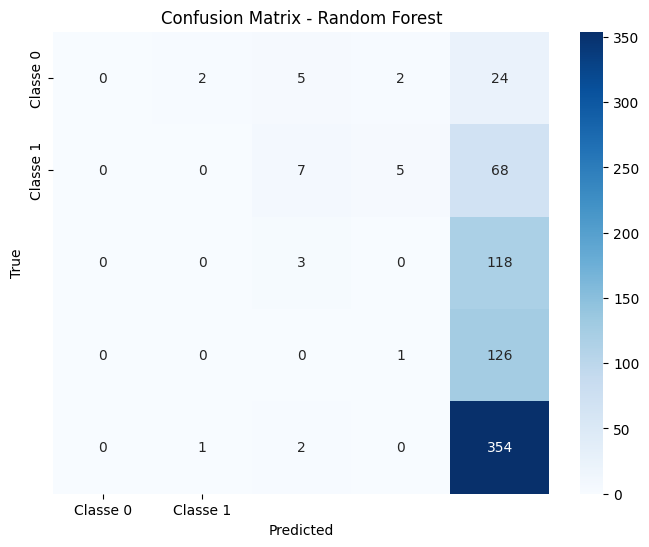

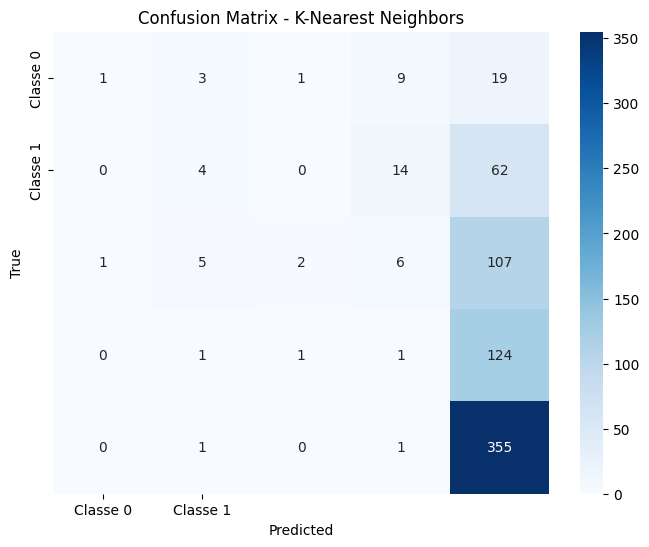

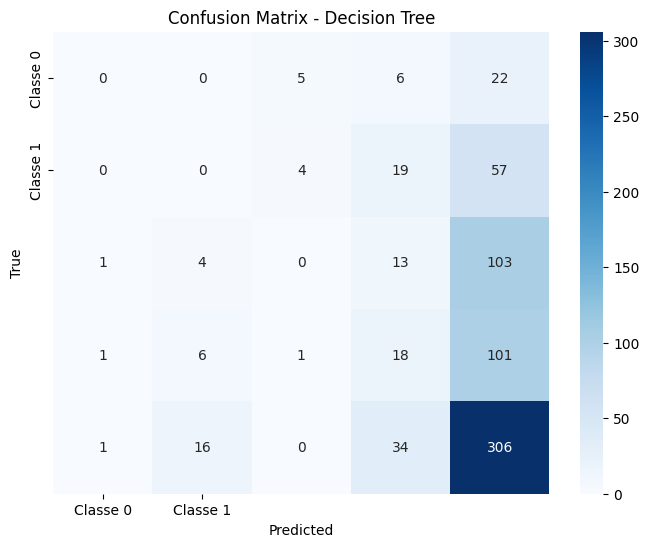

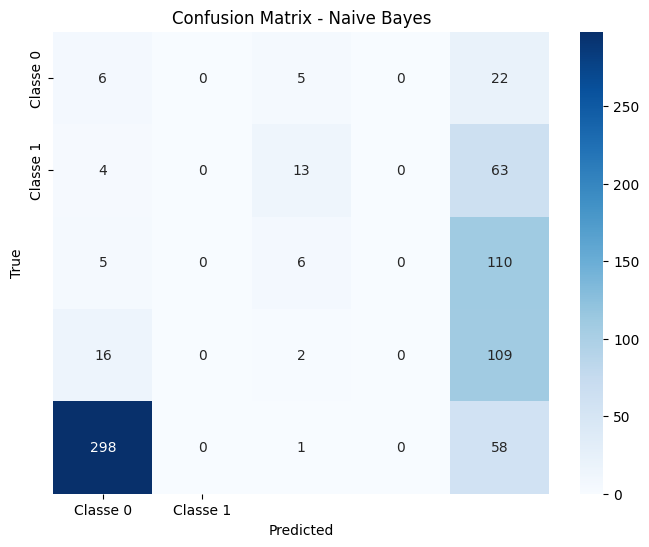

/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


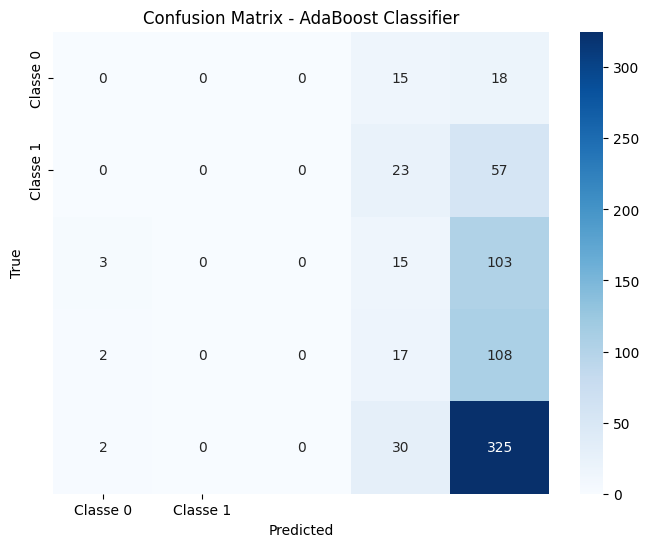

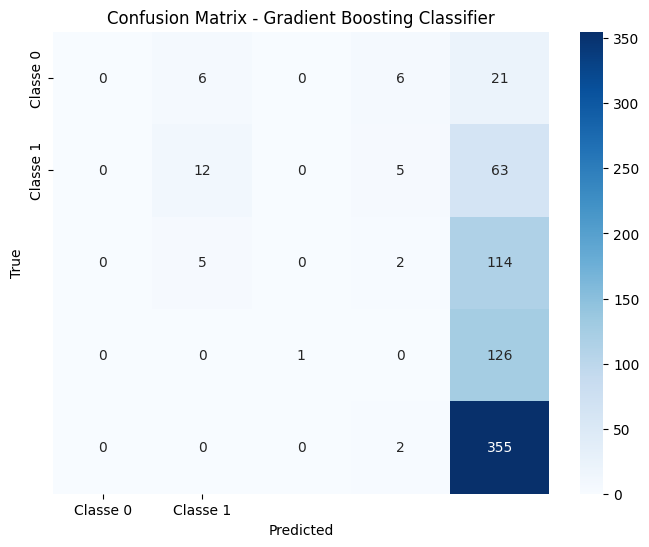

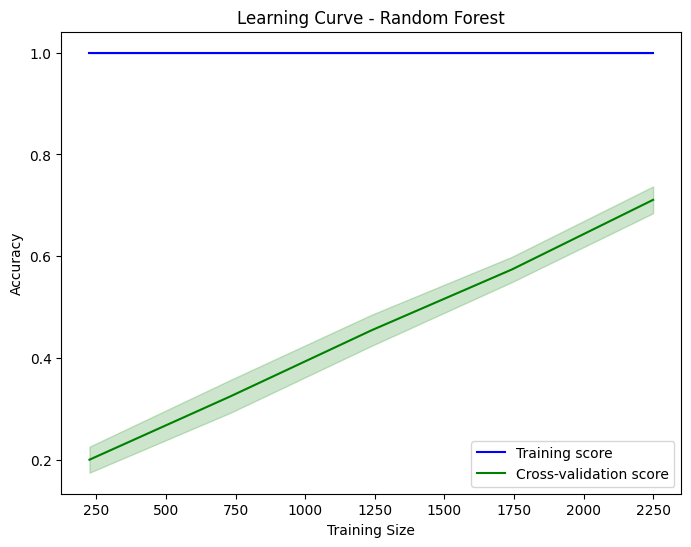

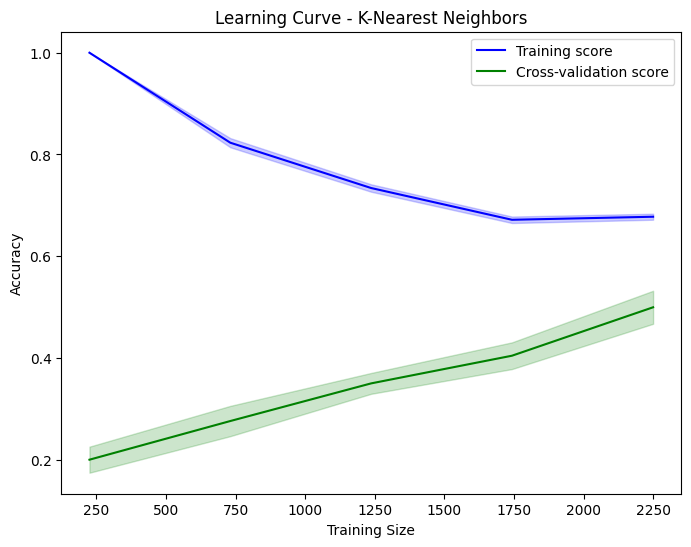

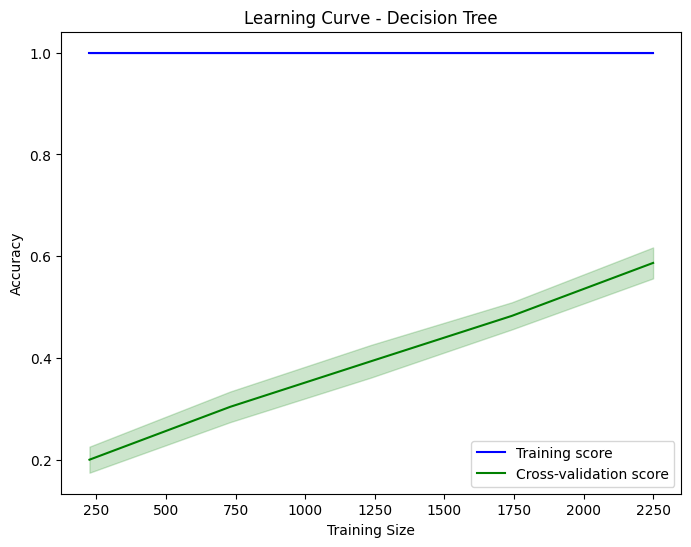

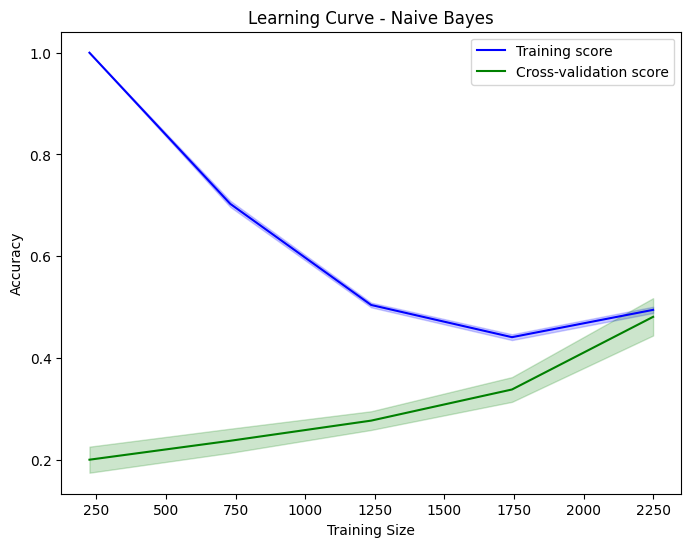

/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated a

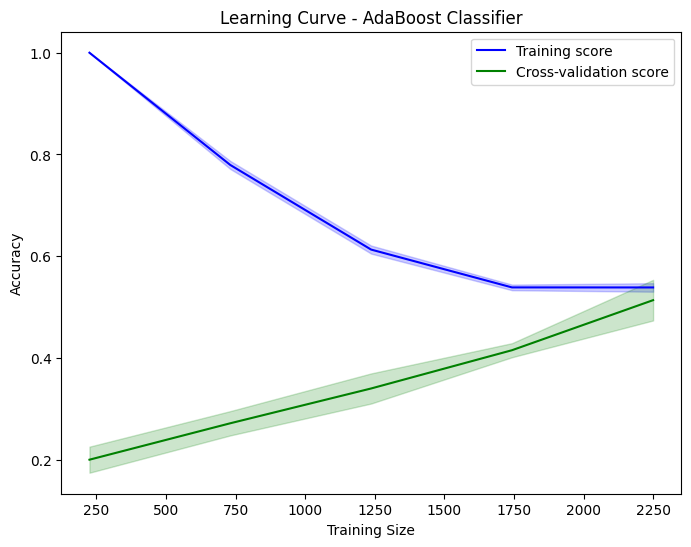

/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/lauraferretti/.venvs/te

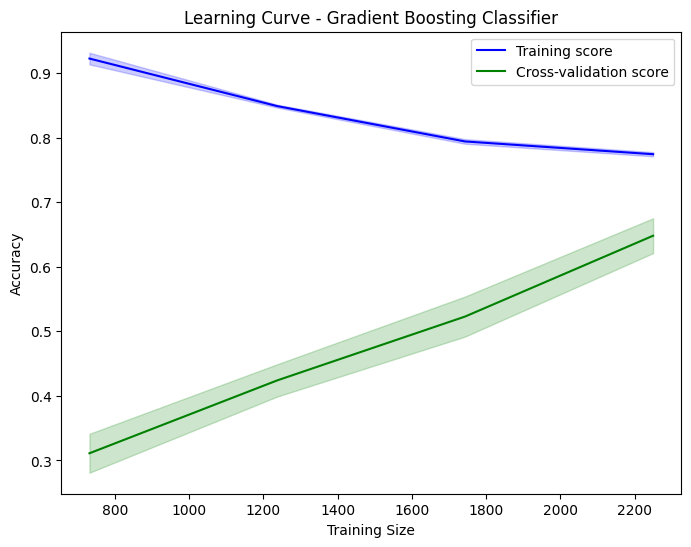

In [7]:
# Confusion Matrix Heatmap
for model_name, model in models_def_params.items():
    model.fit(x_train_scaled, y_train)  # Addestrare il modello
    y_pred = model.predict(x_test)  # Predizione sui dati di test
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Learning Curve
for model_name, model in models_def_params.items():
    train_sizes, train_scores, test_scores = learning_curve(model, x_train_scaled, y_train, cv=kf, n_jobs=-1, scoring='accuracy')
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label='Training score', color='blue')
    plt.plot(train_sizes, test_mean, label='Cross-validation score', color='green')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve - {model_name}')
    plt.legend(loc='best')
    plt.show()

/var/folders/d6/5xkmvg0d43z7zms8_0m9g08r0000gn/T/ipykernel_2120/853566933.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Mean Accuracy', data=results_df, palette='Blues')


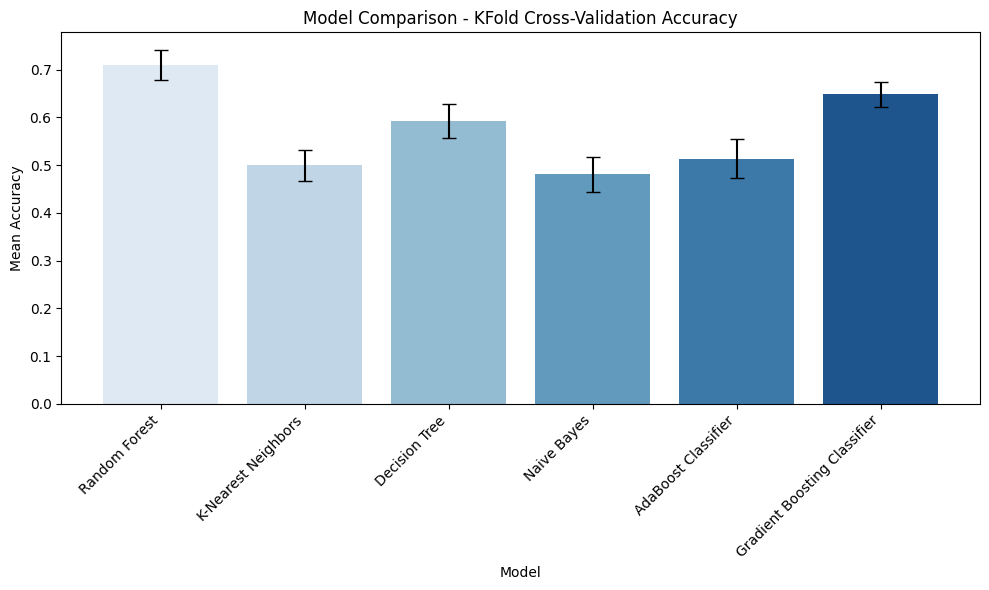

In [8]:
# Moltiplicare per un fattore per visualizzare meglio le barre di errore (ad esempio, 100)
scaled_std_accuracies = results_df['Std Accuracy']

# Grafico con Seaborn
plt.figure(figsize=(10, 6))

# Barplot di Seaborn
sns.barplot(x='Model', y='Mean Accuracy', data=results_df, palette='Blues')

# Aggiungere le barre di errore
plt.errorbar(x=range(len(results_df['Model'])), y=results_df['Mean Accuracy'],
             yerr=scaled_std_accuracies, fmt='none', color='black', capsize=5)

# Aggiungi titolo e etichette
plt.title('Model Comparison - KFold Cross-Validation Accuracy')
plt.xlabel('Model')
plt.ylabel('Mean Accuracy')
plt.xticks(rotation=45, ha='right')  # Ruotare le etichette dei modelli per una migliore visibilità

# Layout ottimizzato
plt.tight_layout()
plt.show()

## Grid search per individuare i parametri migliori

In [9]:
# Definisci la griglia di parametri per Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search su Random Forest
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)

# Miglior modello trovato
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)


Best parameters found:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation accuracy:  0.7020000000000001


In [9]:
# Definizione della griglia di parametri per il modello SVC
param_grid = {
    'C': [1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto'],
}

# Impostazione del modello SVC
svc = SVC()

# Configurazione della GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Esecuzione della Grid Search
grid_search.fit(x_train_scaled, y_train)

# Visualizzazione dei migliori parametri e della migliore accuratezza
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)


Best parameters found:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation accuracy:  0.5955999999999999


In [10]:
# Definire la griglia di parametri per AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],  # Numero di stadi (alberi)
    'learning_rate': [0.01, 0.1, 1.0],  # Tasso di apprendimento
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=3)]  # Alberi base
}

# Creare un'istanza di AdaBoost
ada_boost = AdaBoostClassifier()

# Configurare GridSearchCV
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Eseguire la Grid Search
grid_search.fit(x_train_scaled, y_train)

# Visualizzare i migliori parametri e il miglior score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated a

Best parameters found:  {'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.01, 'n_estimators': 50}
Best cross-validation accuracy:  0.5416


/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [11]:
# Definire la griglia di parametri per KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Numero di vicini
    'weights': ['uniform', 'distance'],  # Criterio di pesatura
    'metric': ['minkowski', 'euclidean', 'manhattan'],  # Metriche di distanza
    'p': [1, 2],  # Parametro di distanza per Minkowski (1=Manhattan, 2=Euclidean)
}

# Creare un'istanza del modello KNN
knn = KNeighborsClassifier()

# Configurare GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Eseguire la Grid Search
grid_search.fit(x_train_scaled, y_train)

# Visualizzare i migliori parametri e il miglior score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)


Best parameters found:  {'metric': 'minkowski', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best cross-validation accuracy:  0.5835999999999999


In [12]:
# Definire la griglia di parametri per GaussianNB
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],  # Variabile di smoothing per evitare problemi numerici
}

# Creare un'istanza del modello GaussianNB
gnb = GaussianNB()

# Configurare GridSearchCV
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Eseguire la Grid Search
grid_search.fit(x_train_scaled, y_train)

# Visualizzare i migliori parametri e il miglior score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)


Best parameters found:  {'var_smoothing': 1e-09}
Best cross-validation accuracy:  0.45640000000000003


## Definizione modelli

In [14]:
models_pers_params = {
    "Random Forest": RandomForestClassifier(max_depth= 20, n_estimators=300),
    "K-Nearest Neighbors": KNeighborsClassifier(metric = 'minkowski', n_neighbors=3, p=1, weights = 'distance' ),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(var_smoothing= 1e-07),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators=50, estimator= DecisionTreeClassifier(max_depth=3)),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42)
}


### Calcolo del cross_val_score

In [15]:
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

model_names = []
mean_accuracies = []
std_accuracies = []

# Calcolare la media e la deviazione standard per ciascun modello
for model_name, model in models_pers_params.items():
    cv_scores = cross_val_score(model, x_train_scaled, y_train, cv=kf, scoring='accuracy')
    model_names.append(model_name)
    mean_accuracies.append(cv_scores.mean())
    std_accuracies.append(cv_scores.std())
    
results_df = pd.DataFrame({
    'Model': model_names,
    'Mean Accuracy': mean_accuracies,
    'Std Accuracy': std_accuracies
})


/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated a

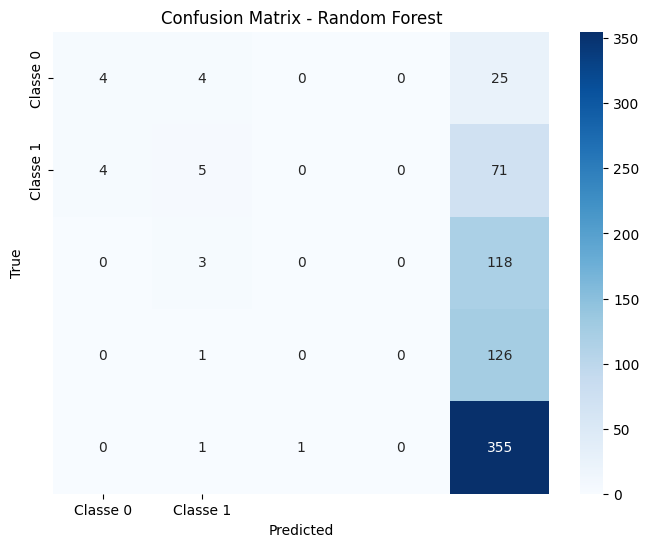

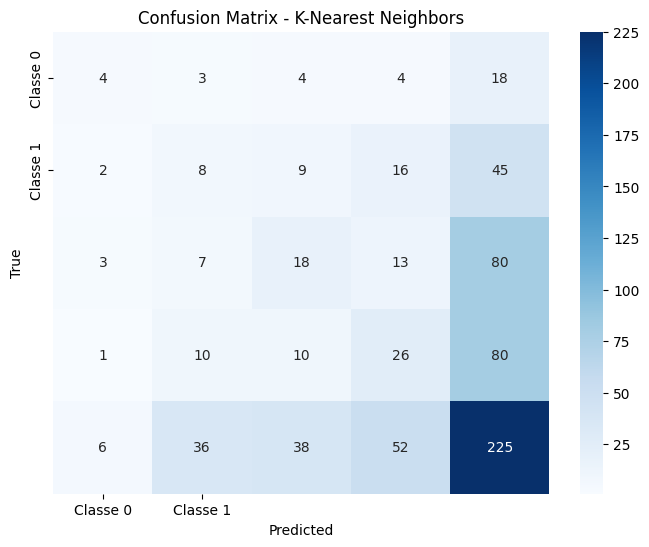

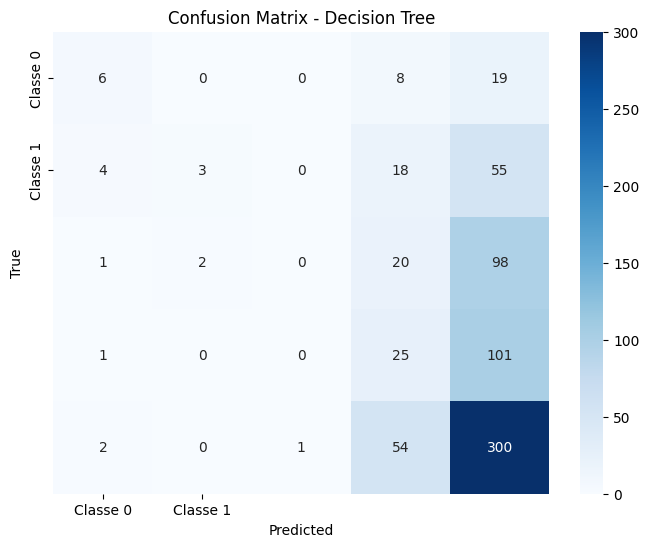

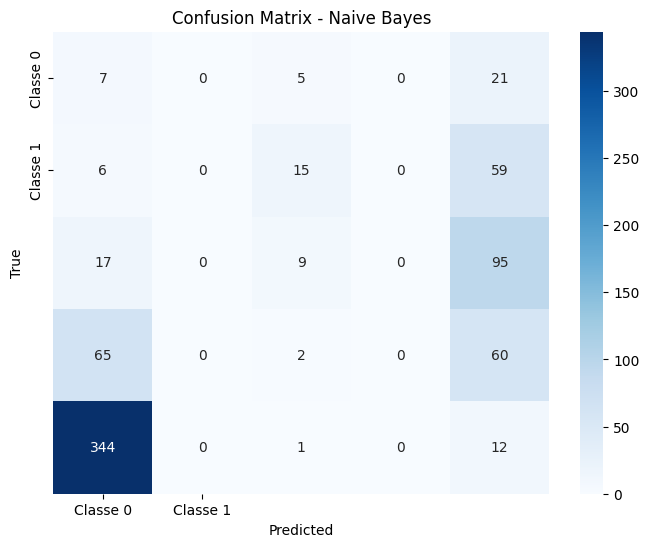

c:\Users\gians_ji5genm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


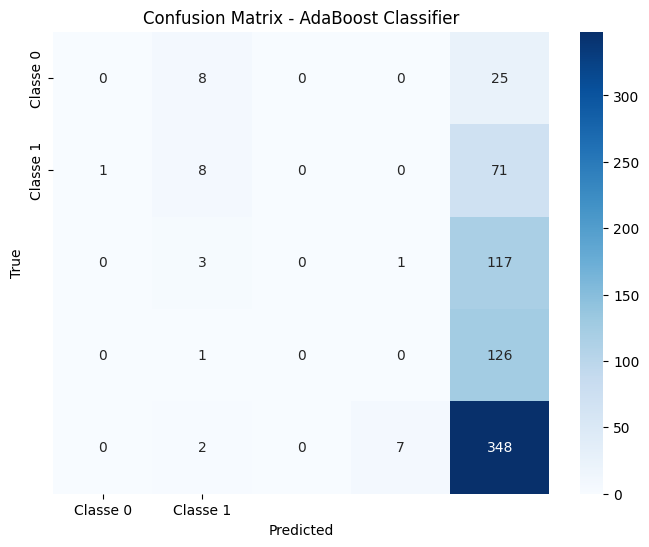

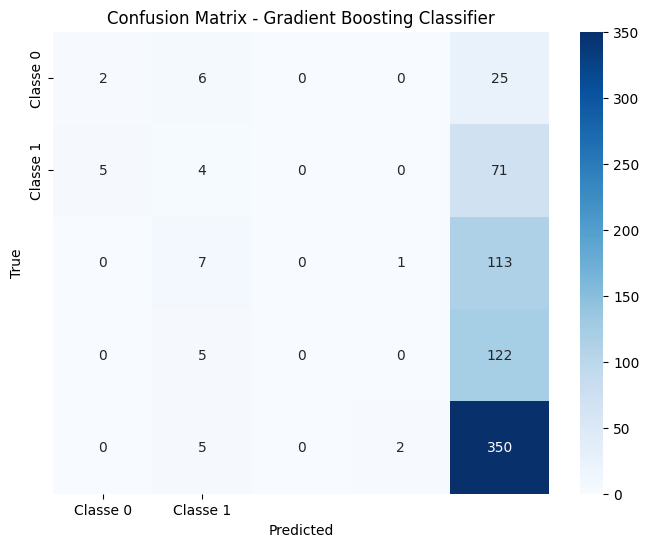

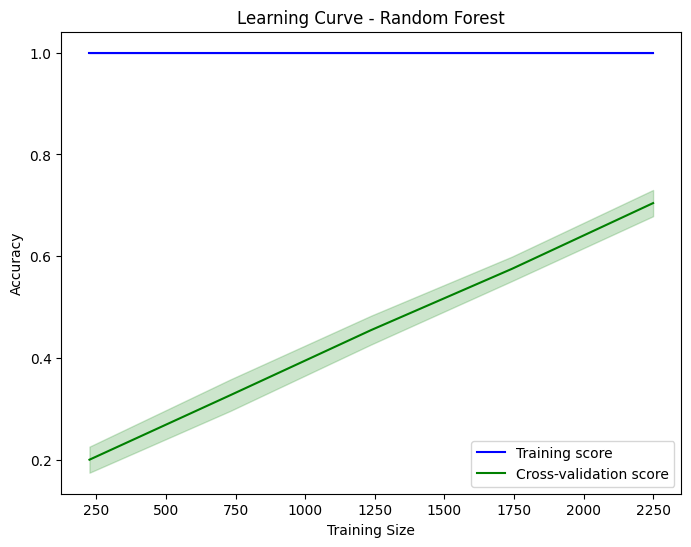

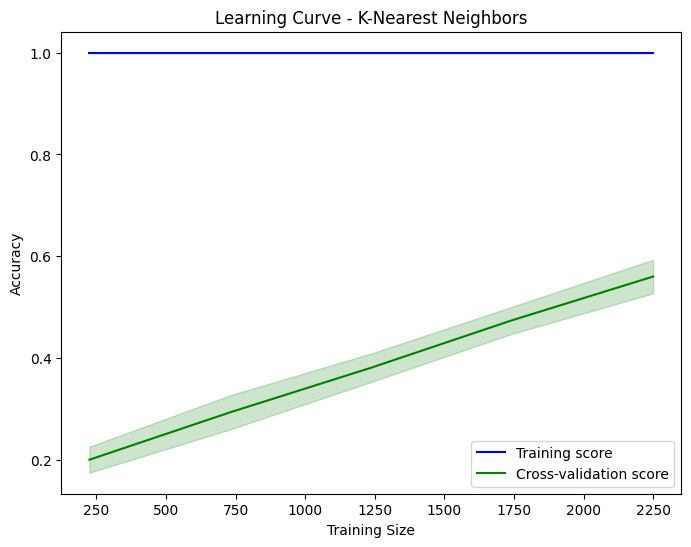

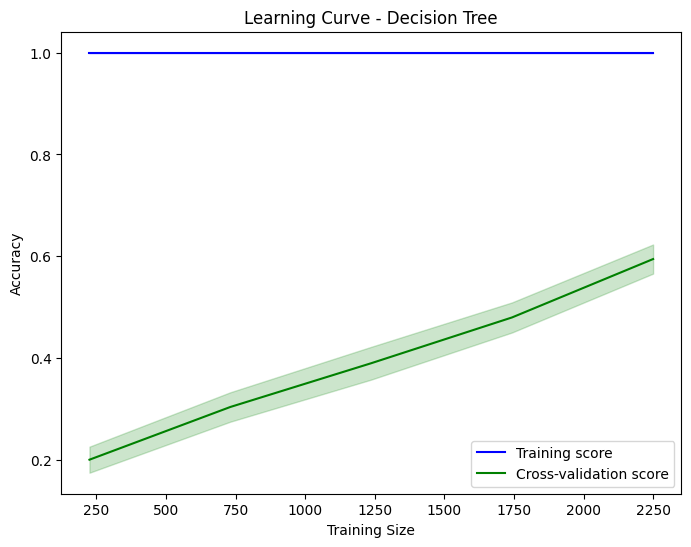

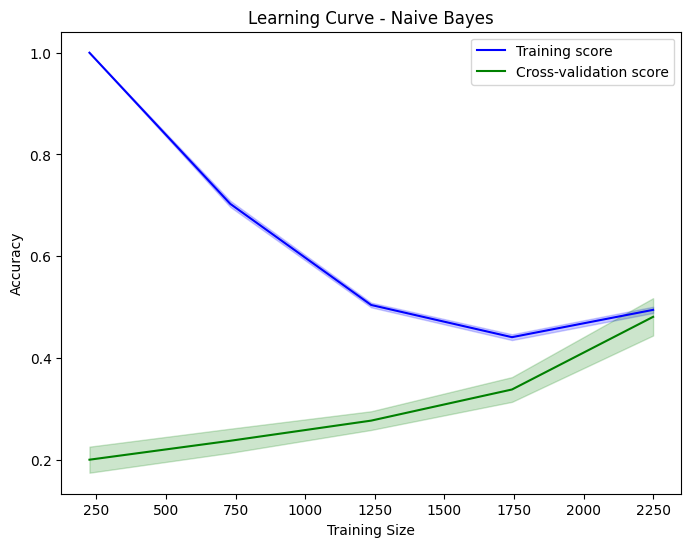

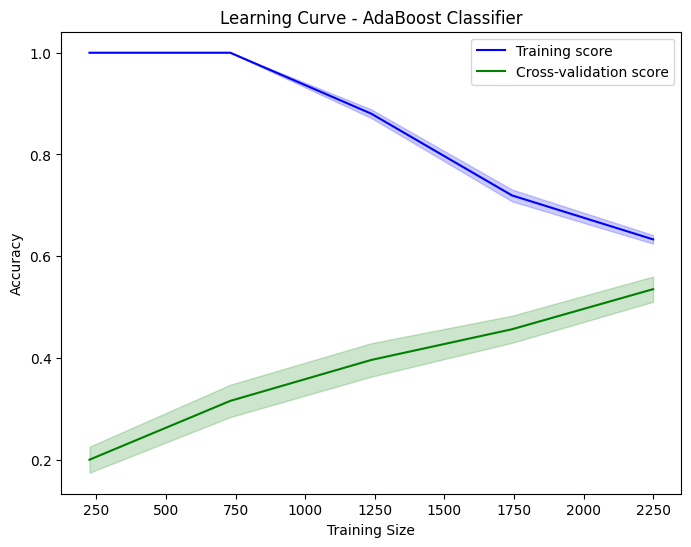

c:\Users\gians_ji5genm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gians_ji5genm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gians_ji5genm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

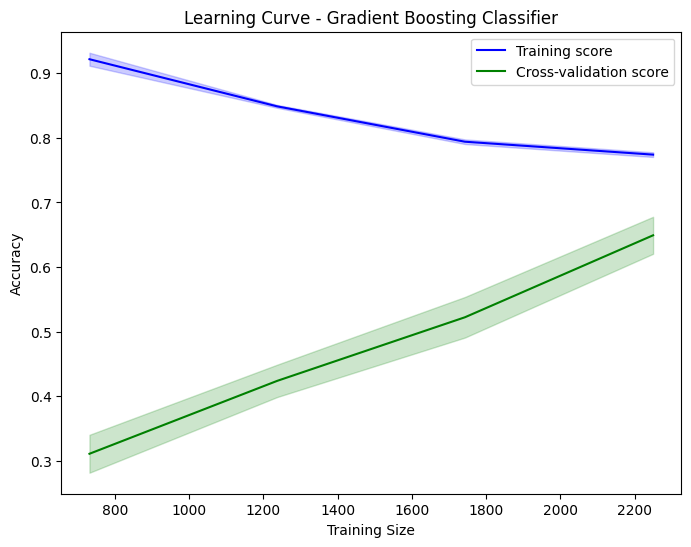

In [16]:
# Confusion Matrix Heatmap
for model_name, model in models_pers_params.items():
    model.fit(x_train_scaled, y_train)  # Addestrare il modello
    y_pred = model.predict(x_test)  # Predizione sui dati di test
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Learning Curve
for model_name, model in models_pers_params.items():
    train_sizes, train_scores, test_scores = learning_curve(model, x_train_scaled, y_train, cv=kf, n_jobs=-1, scoring='accuracy')
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label='Training score', color='blue')
    plt.plot(train_sizes, test_mean, label='Cross-validation score', color='green')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve - {model_name}')
    plt.legend(loc='best')
    plt.show()

/var/folders/d6/5xkmvg0d43z7zms8_0m9g08r0000gn/T/ipykernel_2120/194410439.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Mean Accuracy', data=results_df, palette='Reds')


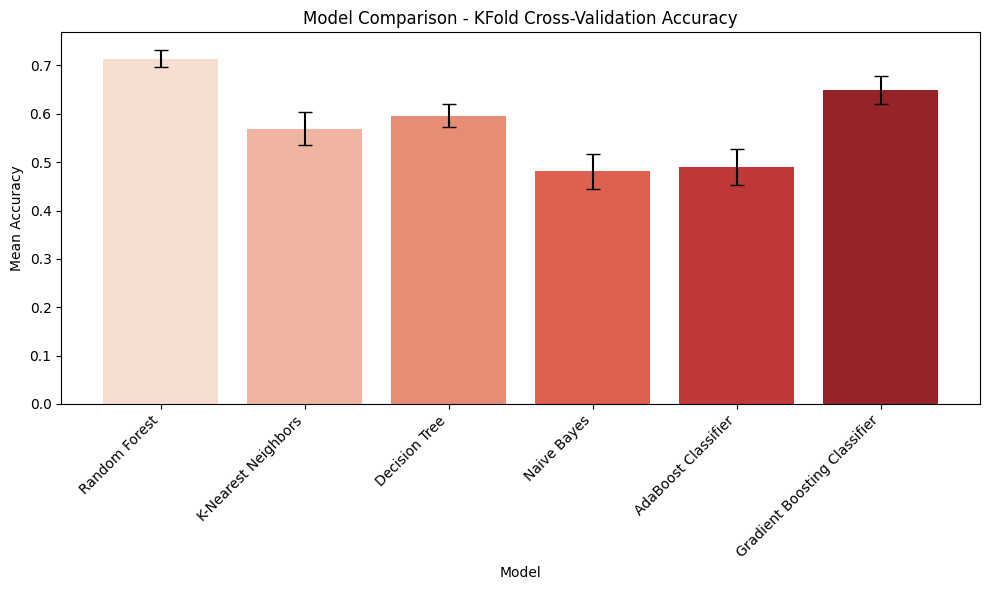

In [16]:
# Moltiplicare per un fattore per visualizzare meglio le barre di errore (ad esempio, 100)
scaled_std_accuracies = results_df['Std Accuracy']

# Grafico con Seaborn
plt.figure(figsize=(10, 6))

# Barplot di Seaborn
sns.barplot(x='Model', y='Mean Accuracy', data=results_df, palette='Reds')

# Aggiungere le barre di errore
plt.errorbar(x=range(len(results_df['Model'])), y=results_df['Mean Accuracy'],
             yerr=scaled_std_accuracies, fmt='none', color='black', capsize=5)

# Aggiungi titolo e etichette
plt.title('Model Comparison - KFold Cross-Validation Accuracy')
plt.xlabel('Model')
plt.ylabel('Mean Accuracy')
plt.xticks(rotation=45, ha='right')  # Ruotare le etichette dei modelli per una migliore visibilità

# Layout ottimizzato
plt.tight_layout()
plt.show()

## Training e testing modelli

In [17]:
for model_name, model in models_pers_params.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test)
    print(f"\n{model_name} - Test Set Evaluation")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Random Forest - Test Set Evaluation
Accuracy: 0.4958217270194986
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        33
         1.0       0.00      0.00      0.00        80
         2.0       0.06      0.01      0.01       121
         3.0       0.09      0.01      0.01       127
         4.0       0.51      0.99      0.68       357

    accuracy                           0.50       718
   macro avg       0.13      0.20      0.14       718
weighted avg       0.28      0.50      0.34       718


K-Nearest Neighbors - Test Set Evaluation
Accuracy: 0.48885793871866295
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        33
         1.0       0.20      0.01      0.02        80
         2.0       0.20      0.02      0.04       121
         3.0       0.13      0.03      0.05       127
         4.0       0.52      0.96      0.67       357

    accuracy                           0.49   

/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f


Gradient Boosting Classifier - Test Set Evaluation
Accuracy: 0.5013927576601671
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        33
         1.0       0.50      0.06      0.11        80
         2.0       0.00      0.00      0.00       121
         3.0       0.00      0.00      0.00       127
         4.0       0.52      0.99      0.69       357

    accuracy                           0.50       718
   macro avg       0.20      0.21      0.16       718
weighted avg       0.32      0.50      0.35       718



/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f


Modello: Random Forest
Accuratezza: 0.4986
Report di classificazione:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        33
         1.0       0.00      0.00      0.00        80
         2.0       0.16      0.02      0.04       121
         3.0       0.11      0.01      0.01       127
         4.0       0.51      0.99      0.68       357

    accuracy                           0.50       718
   macro avg       0.16      0.20      0.15       718
weighted avg       0.30      0.50      0.35       718



/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

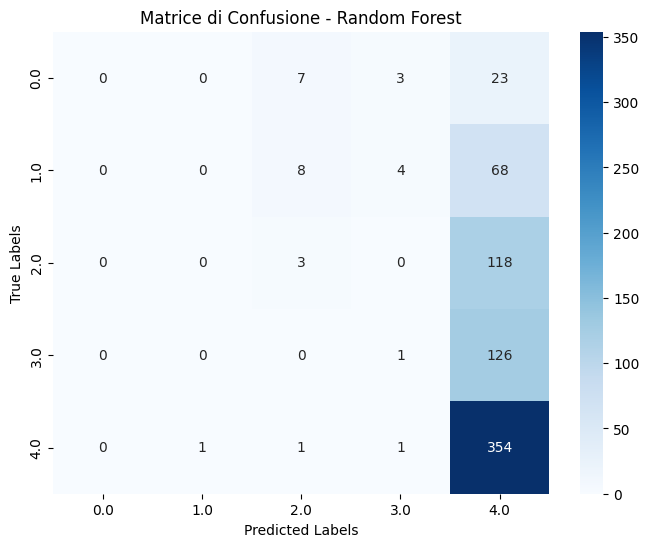


Modello: K-Nearest Neighbors
Accuratezza: 0.4889
Report di classificazione:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        33
         1.0       0.20      0.01      0.02        80
         2.0       0.20      0.02      0.04       121
         3.0       0.13      0.03      0.05       127
         4.0       0.52      0.96      0.67       357

    accuracy                           0.49       718
   macro avg       0.21      0.21      0.16       718
weighted avg       0.34      0.49      0.35       718



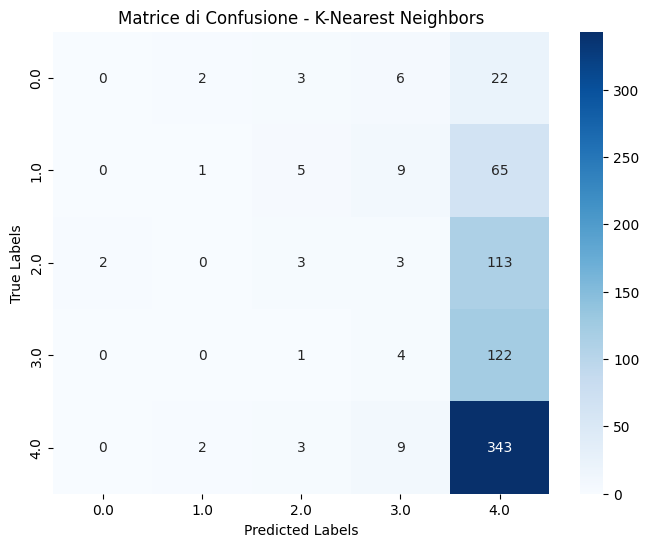


Modello: Decision Tree
Accuratezza: 0.4485
Report di classificazione:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        33
         1.0       0.00      0.00      0.00        80
         2.0       0.00      0.00      0.00       121
         3.0       0.20      0.14      0.17       127
         4.0       0.52      0.85      0.64       357

    accuracy                           0.45       718
   macro avg       0.14      0.20      0.16       718
weighted avg       0.29      0.45      0.35       718



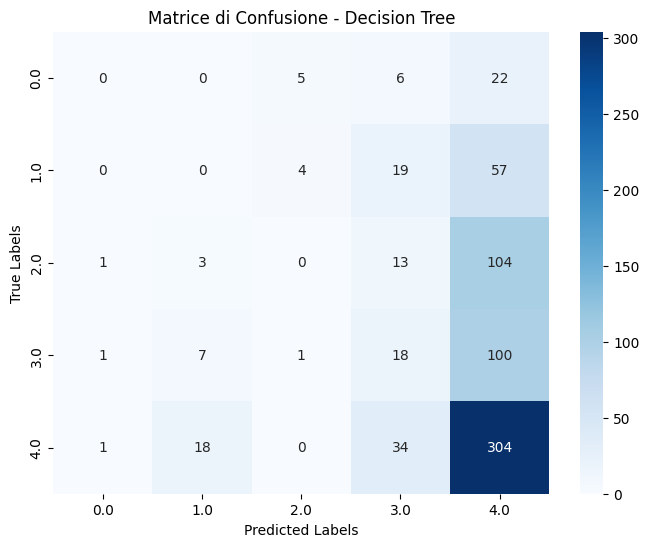


Modello: Naive Bayes
Accuratezza: 0.0975
Report di classificazione:
               precision    recall  f1-score   support

         0.0       0.02      0.18      0.03        33
         1.0       0.00      0.00      0.00        80
         2.0       0.22      0.05      0.08       121
         3.0       0.00      0.00      0.00       127
         4.0       0.16      0.16      0.16       357

    accuracy                           0.10       718
   macro avg       0.08      0.08      0.06       718
weighted avg       0.12      0.10      0.10       718



/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

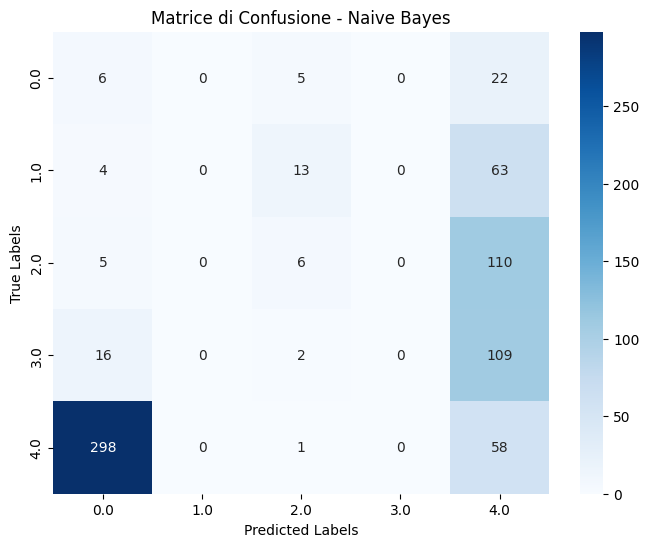


Modello: AdaBoost Classifier
Accuratezza: 0.4944
Report di classificazione:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        33
         1.0       0.23      0.04      0.06        80
         2.0       0.11      0.02      0.03       121
         3.0       0.04      0.01      0.01       127
         4.0       0.53      0.98      0.69       357

    accuracy                           0.49       718
   macro avg       0.18      0.21      0.16       718
weighted avg       0.31      0.49      0.36       718



/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lauraferretti/.venvs/text

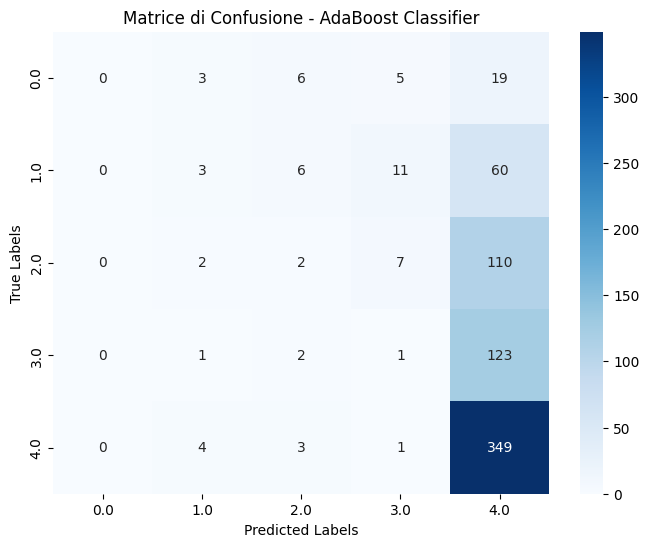


Modello: Gradient Boosting Classifier
Accuratezza: 0.5014
Report di classificazione:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        33
         1.0       0.50      0.06      0.11        80
         2.0       0.00      0.00      0.00       121
         3.0       0.00      0.00      0.00       127
         4.0       0.52      0.99      0.69       357

    accuracy                           0.50       718
   macro avg       0.20      0.21      0.16       718
weighted avg       0.32      0.50      0.35       718



/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

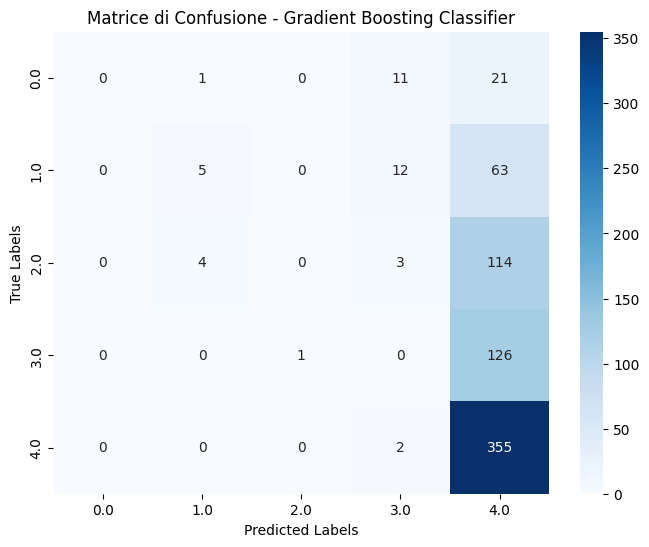

In [18]:
# Itera su ciascun modello per addestrare, fare previsioni e valutare le prestazioni
for model_name, model in models_pers_params.items():
    print(f"\nModello: {model_name}")
    
    # Addestra il modello
    model.fit(x_train_scaled, y_train)
    
    # Previsione sul set di test
    y_pred = model.predict(x_test)
    
    # Valuta le prestazioni
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Calcola la matrice di confusione
    cm = confusion_matrix(y_test, y_pred)
    
    # Stampa i risultati
    print(f"Accuratezza: {accuracy:.4f}")
    print("Report di classificazione:\n", report)
    
    # Visualizza la matrice di confusione
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Matrice di Confusione - {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

## Ensemble learning

/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        33
         1.0       0.00      0.00      0.00        80
         2.0       0.06      0.01      0.01       121
         3.0       0.00      0.00      0.00       127
         4.0       0.51      0.99      0.68       357

    accuracy                           0.49       718
   macro avg       0.11      0.20      0.14       718
weighted avg       0.27      0.49      0.34       718



/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

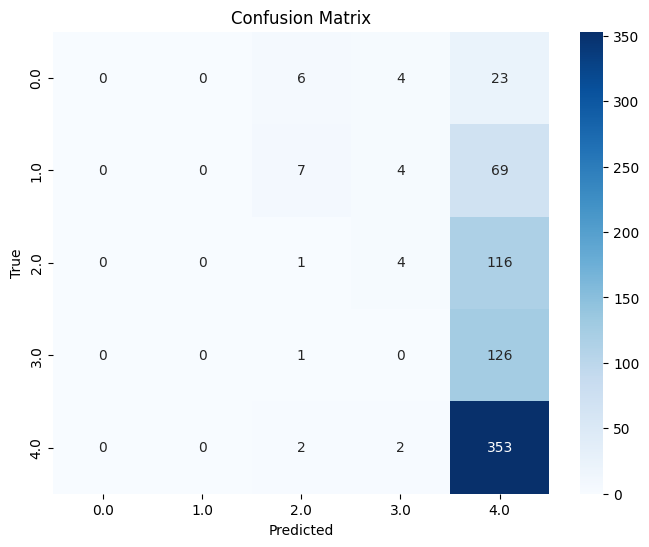

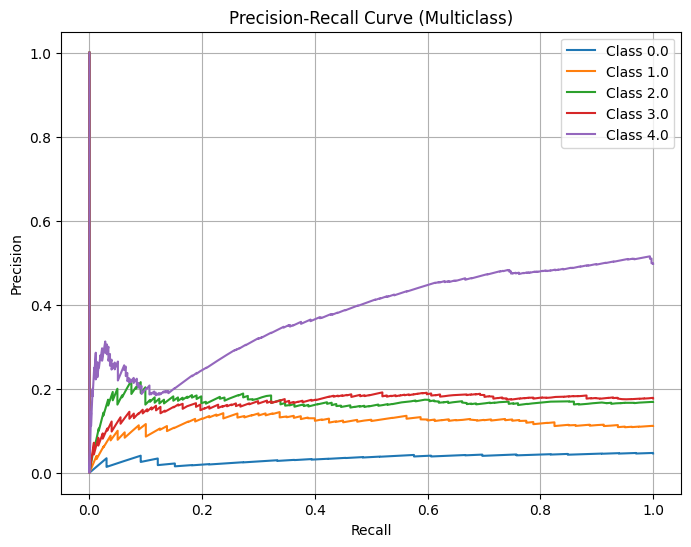

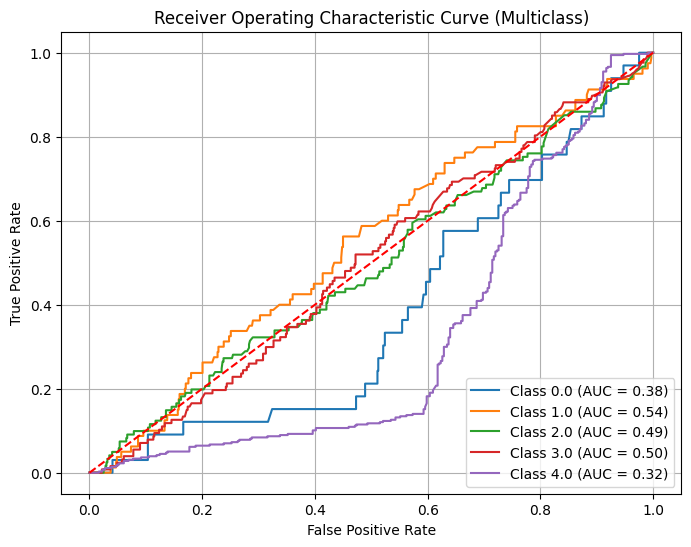

/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated a

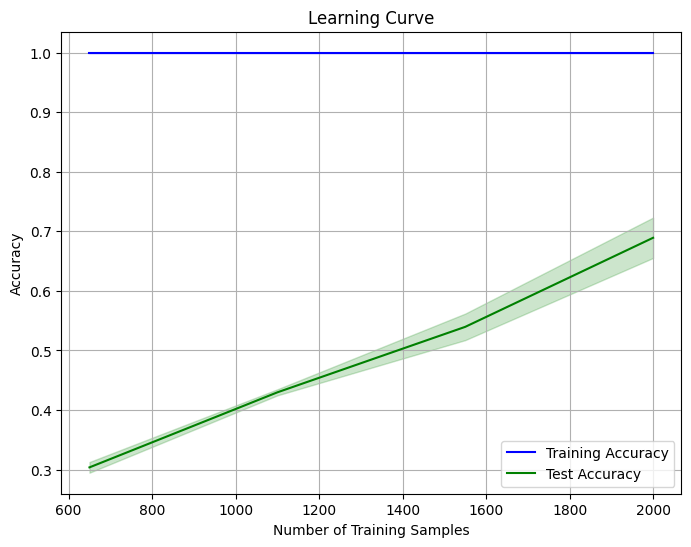

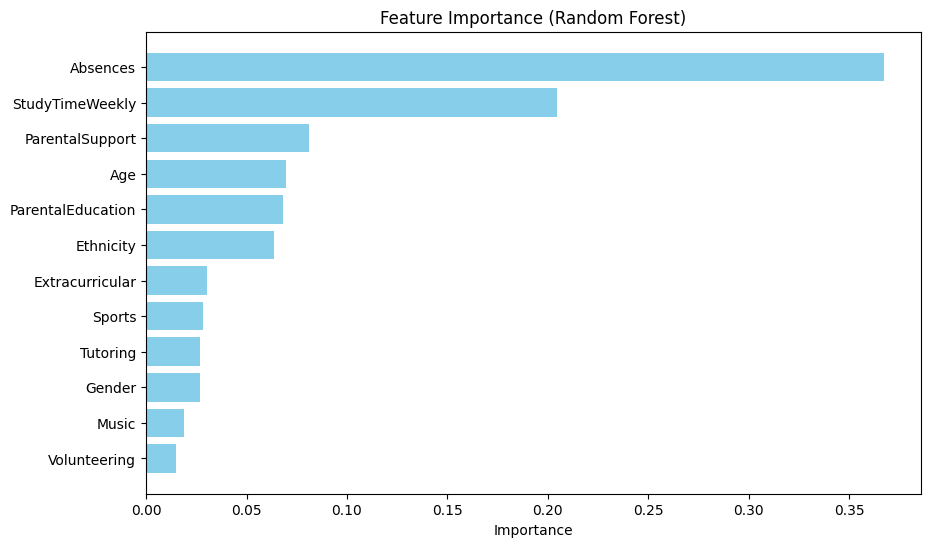

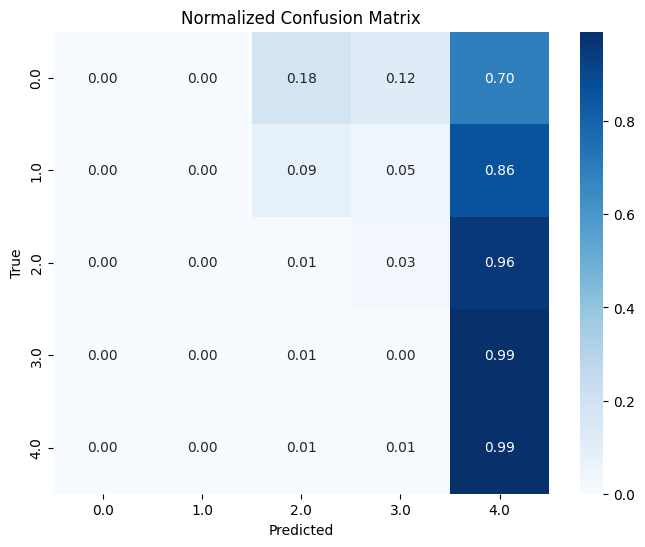

In [19]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Definire il Voting Classifier con soft voting
voting_clf = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(max_depth=20, n_estimators=300)),
        ('knn', KNeighborsClassifier(metric='minkowski', n_neighbors=3, p=1, weights='distance')),
        ('dt', DecisionTreeClassifier()),
        ('nb', GaussianNB(var_smoothing=1e-07)),
        ('ada', AdaBoostClassifier(n_estimators=200, estimator=DecisionTreeClassifier(max_depth=3))),
        ('gbc', GradientBoostingClassifier(random_state=42))
    ],
    voting='soft',  # Usando soft voting
    n_jobs=-1  # Usa tutti i core disponibili
)

# Addestrare il Voting Classifier
voting_clf.fit(x_train_scaled, y_train)

# Predire e calcolare l'accuratezza
y_pred = voting_clf.predict(x_test)

# Calcolare e visualizzare il classification report
print(classification_report(y_test, y_pred))

# **Confusion Matrix**
cm = confusion_matrix(y_test, y_pred)

# Visualizzare la matrice di confusione come una heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=voting_clf.classes_, yticklabels=voting_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Curva Precision-Recall per Multiclass**
y_test_bin = label_binarize(y_test, classes=voting_clf.classes_)

plt.figure(figsize=(8, 6))
for i in range(y_test_bin.shape[1]):
    y_scores = voting_clf.predict_proba(x_test)[:, i]  # Probabilità per ogni classe
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_scores)
    plt.plot(recall, precision, label=f'Class {voting_clf.classes_[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Multiclass)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# **Curva ROC per Multiclass**
plt.figure(figsize=(8, 6))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], voting_clf.predict_proba(x_test)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {voting_clf.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linea casuale
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (Multiclass)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# **Learning Curve**
train_sizes, train_scores, test_scores = learning_curve(voting_clf, x_train_scaled, y_train, cv=5)

# Calcolare la media e la deviazione standard dei punteggi
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Tracciare la learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_mean, label='Test Accuracy', color='green')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# **Feature Importance (Random Forest)**
importances = voting_clf.named_estimators_['rf'].feature_importances_

# Creare un dataframe per le feature importances
features = x_train_scaled.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Ordinare per importanza
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Tracciare un bar plot per le feature più importanti
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()  # Invertire l'asse y per mostrare le feature più importanti in alto
plt.show()

# **Matrice di Confusione Normalizzata**
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Visualizzare la matrice di confusione normalizzata
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=voting_clf.classes_, yticklabels=voting_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()


/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated a

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        33
         1.0       0.00      0.00      0.00        80
         2.0       0.12      0.02      0.03       121
         3.0       0.10      0.01      0.01       127
         4.0       0.51      0.99      0.68       357

    accuracy                           0.50       718
   macro avg       0.15      0.20      0.14       718
weighted avg       0.29      0.50      0.34       718



/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lauraferretti/.venvs/textToSpeech/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

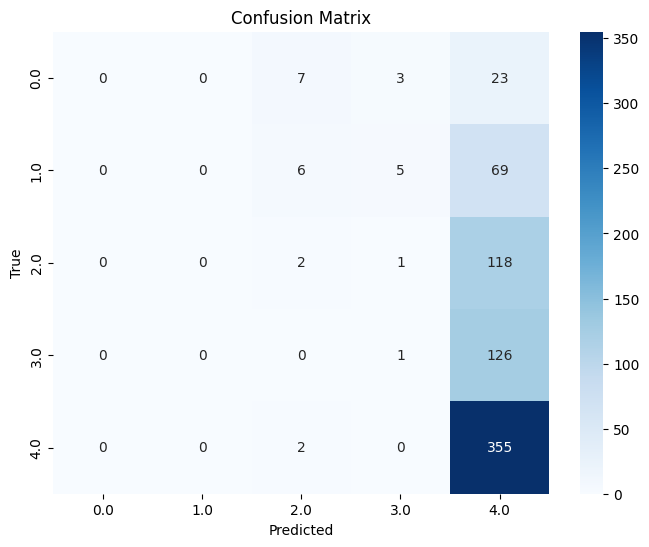

In [20]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Definire i modelli di base
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=300, random_state=42)),
    ('knn', KNeighborsClassifier(metric='minkowski', n_neighbors=3, p=1, weights='distance')),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('nb', GaussianNB()),
    ('ada', AdaBoostClassifier(n_estimators=200, estimator=DecisionTreeClassifier(max_depth=3), random_state=42)),
    ('gbc', GradientBoostingClassifier(random_state=42))
]

# Meta-modello
meta_model = LogisticRegression()

# Creare il modello di stacking
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    n_jobs=-1
)

# Addestrare il modello di stacking
stacking_clf.fit(x_train_scaled, y_train)

# Predire e calcolare l'accuratezza
y_pred = stacking_clf.predict(x_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Visualizzare la matrice di confusione come una heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=stacking_clf.classes_, yticklabels=stacking_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
